<a href="https://colab.research.google.com/github/SrMouraSilva/Introducao-a-Modelagem/blob/main/3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

In [ ]:
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 3.3

A statistical algorithm to determine the difference in effectiveness between treatments requires maximizing the quantity

$$
\sum_{(k_1, k_2)\in E} 
{n_1 \choose k_1} p_1^{k_1} (1-p_1)^{n_1-k_1}
{n_2 \choose k_2} p_2^{k_2} (1-p_2)^{n_2-k_2}
$$
over the set
$$S=\{(p_1, p_2): p_1-p_2=\Delta;p_1, p_2\in[0,1]\}$$
Here $E$ is a subset of the set
$$
E_0 = \{(k_1, k_2): 
    k_1=0, 1, 2, \cdots, n_1;
    k_2=0, 1, 2, \cdots, n_2
\}
$$
and $\Delta \in [-1, 1]$.

Find the maximum in the case $n_1=n_2=4, \Delta=-0.1$,
$$
E=\{
    (0, 4), (0, 3), (0, 2), (0, 1),
    (1, 4), (1, 3), (2, 4)
\}
$$
(Santner and Snell (1980)).

### Solução

Solucionemos este problema por meio dos cinco passos

#### Passo 1 - Variáveis

* $k_1, k_2$
* $p_1, p_2$
* $E$
* $\Delta$

#### Passo 1 - Suposições do problema

In [ ]:
from sympy.functions.combinatorial.factorials import binomial as coeficiente_binomial

p1, p2 = var('p_1 p_2', real=True)

n1 = 4
n2 = 4

Δ = -0.1
E = {
    (0, 4), (0, 3), (0, 2), (0, 1),
    (1, 4), (1, 3), (2, 4)
}

Dado que $\Delta = -0.1 = p_1-p_2$, podemos então definir uma variável $x$ onde 
* $p_1=x$, e;
* $p_2 = x-\Delta = x + 0.1$.


#### Passo 2 - Abordagem de modelagem

Problema de otimização unidimensional cujo objetivo é maximizar $x$. A solução se dará pelo método analítico.

<!-- Problema de otimização multimensional cujo objetivo é maximizar $p_1$ e $p_2$. A solução se dará pelo método dos multiplicadores de Lagrange. -->


#### Passo 3 - Formulação do modelo

$$
\begin{align}
\text{max} ~~& f(p_1, p_2) \\
\text{sujeito a} ~~& p_1, p_2 \in \Omega \\
\end{align}
$$

Sendo:
* $f(p_1, p_2)$: Função objetivo
* $\Omega$: Espaço viável das variáveis do problema.

Desta forma, temos:

$$
\begin{align}
\text{max} ~~& f(p_1, p_2) = \sum_{(k_1, k_2)\in E} 
{n_1 \choose k_1} p_1^{k_1} (1-p_1)^{n_1-k_1}
{n_2 \choose k_2} p_2^{k_2} (1-p_2)^{n_2-k_2}\\
\text{sujeito a} ~~& p_1 - p_2 = \Delta \\
    & 0 \leq p_1 \leq 1 \\
    & 0 \leq p_2 \leq 1
\end{align}
$$

Pela introdução da nova variável $x$, em que $p_1=x$ e $p_2=x+0.1$, teremos:

$$
\begin{align}
\text{max} ~~& f(x, (x+0.1)) = f(x) = \sum_{(k_1, k_2)\in E} 
{n_1 \choose k_1} x^{k_1} (1-x)^{n_1-k_1}
{n_2 \choose k_2} (x+0.1)^{k_2} (1-(x+0.1))^{n_2-k_2}\\
\text{sujeito a} ~~& x - (x+0.1) = \Delta \\
    & 0 \leq (x+0.1) \leq 1
\end{align}
$$


#### Passo 4 - Resolução do modelo

Função a ser otimizada sem restrição qualquer:

In [ ]:
soma = 0
for k1, k2 in E:
    soma += coeficiente_binomial(n1, k1) * (p1**k1) * (1-p1)**(n1-k1) \
          * coeficiente_binomial(n2, k2) * (p2**k2) * (1-p2)**(n2-k2)
f = soma

Math(f"f(p_1, p_2) = {latex(f)}")

<IPython.core.display.Math object>

Sua representação gráfica em 3d é apresentada abaixo. Vemos que o ponto de máximo corresponde a um valor próximo a $(0, 1)$. Entretanto, tal solução **não atende as restrições**.

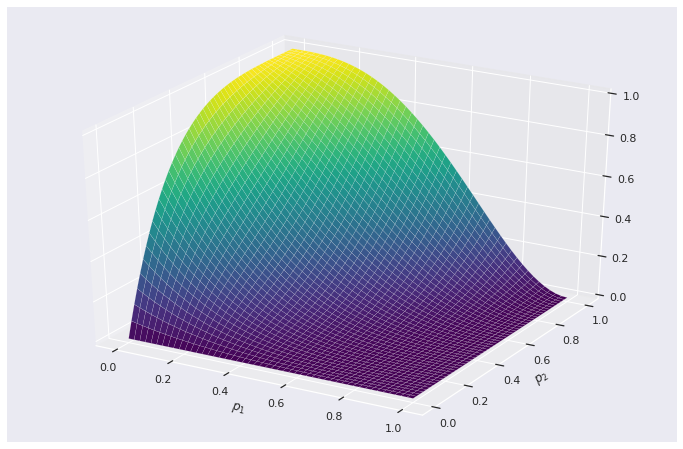

In [ ]:
plot3d(f, (p1, 0, 1), (p2, 0, 1), xlabel='$p_1$', ylabel='$p_2$')

Visualizemos agora o mesmo gráfico a partir de uma visão top-down. Tal como no gráfico anterior, $0 \leq p_1, p_2 \leq 1$. A restrição $p_1 - p_2 = \Delta$ é representada pela reta azul.

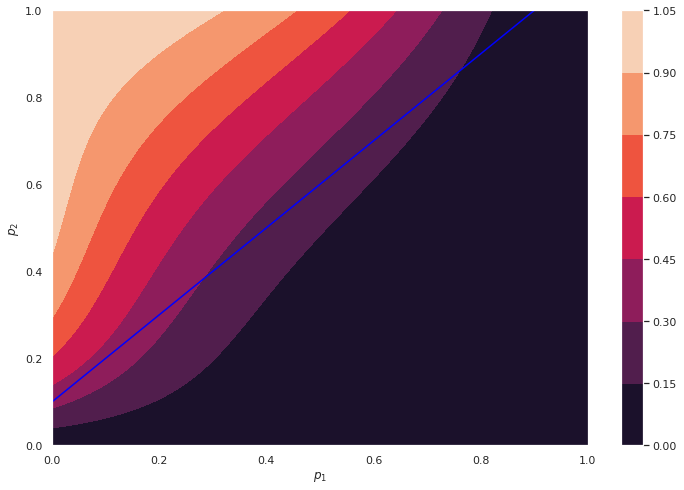

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt

def contour_plot(funcao, **kwargs):
    variables = list(kwargs.keys())
    if len(variables) != 2:
        raise Exception('Contour is for 2 dimentions')

    f = lambdify(variables, funcao, 'numpy')
    # PEP 0468: Python >= 3.6
    spaces = [np.linspace(*kwargs[e], 100) for e in variables]
    grid = np.meshgrid(*spaces)
    
    fig,ax=plt.subplots(1,1, figsize=(12, 8))
    
    c = plt.contourf(*grid, f(*grid))
    c.ax.set_xlabel(f"${variables[0]}$")
    c.ax.set_ylabel(f"${variables[1]}$")
    
    fig.colorbar(c)
    return c
    
def plot_restricao(f, variable, interval, color='blue'):
    f_numpy = lambdify(variable, f, 'numpy')
    
    p1 = np.linspace(*interval, 10)
    p2 = np.linspace(*interval, 10)

    plt.plot(f_numpy(p1), p2, color=color)
    plt.ylim(*interval)
    plt.xlim(*interval)


contour_plot(f, p_1=(0, 1), p_2=(0, 1))
plot_restricao(p_2+Δ, p_2, (0, 1))

Pegando a função e $p_1=x$ e $p_2=x+0.1$, teremos uma nova função $f(x)=f(p_1=x, p_2=x+0.1)$:

In [ ]:
x = var('x', real=True)
f_x = f.subs({p1: x, p2: x-Δ})

Math(f"""
\\begin{{aligned}}
f(x) &= f(p_1=x, p_2=x-\\Delta) \\\\
     &= {latex(f_x)} \\\\
     &= {latex(simplify(f_x))}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Observe que esta nova função $f(x)$ corresponde justamente a reta azul, que define os pontos em que $p_1 - p_2 = \Delta$.
O seguinte gráfico representa o corte da função $f(p_1, p_2)$ para $p_1 - p_2 = \Delta$:

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


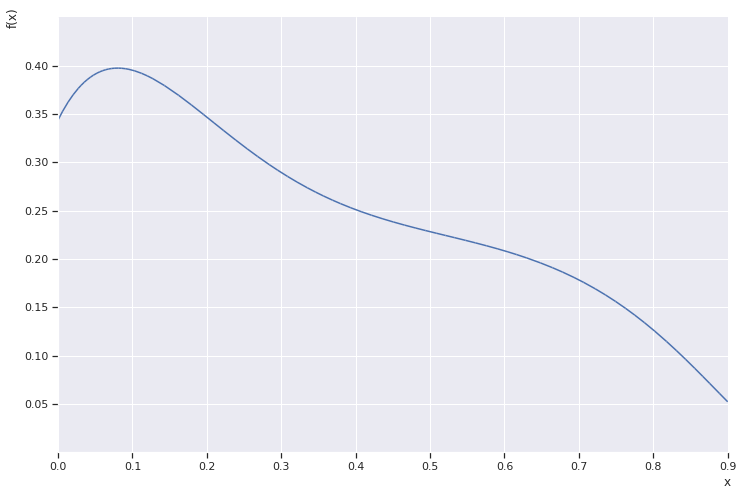

In [ ]:
plot(f_x, (x, 0, .9), ylim=[0, 0.45])

A derivada de $f(x)$ é dada por:

In [ ]:
dfdx = diff(f_x)

Math(f"""
\\begin{{aligned}}
\\frac{{df(x)}}{{dx}} &= {latex(simplify(dfdx))} \\\\
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Igualando a derivada a zero, teremos os seguintes pontos:

In [ ]:
s = solve(diff(f_x))
s

[-0.858586512444530, 0.0800761550611196, 1.00000000000000]

Dado que buscamos a solução que respeita $0 \leq x\leq 0.9$, a solução adequada é a segunda:

In [ ]:
Math(f"""
\\begin{{aligned}}
x &= {s[1]} \\\\
p_1 &= x = {s[1]} \\\\
p_2 &= x - \Delta = {s[1]} - ({Δ}) = {s[1] - Δ}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

A seguir, o mesmo gráfico 3D a partir de uma visão top-down com a reta indicando a linha que respeita a restrição, agora adicionada com uma bola amarela indicando o ponto ótimo.

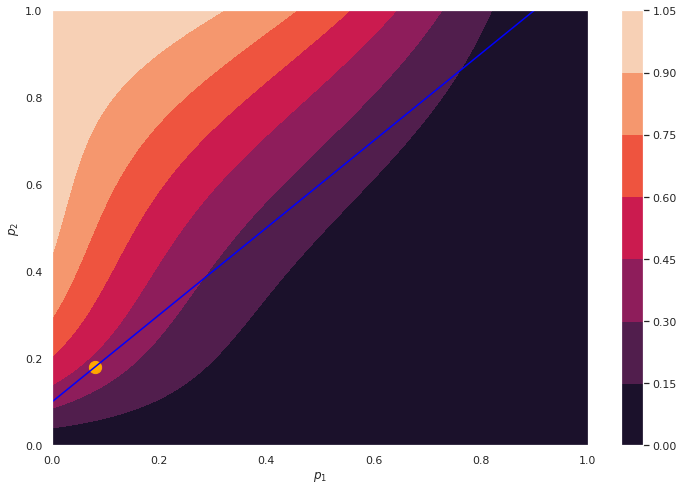

In [ ]:
contour_plot(f, p_1=(0, 1), p_2=(0, 1))
plot_restricao(p_2+Δ, p_2, (0, 1))
plt.scatter(s[1], s[1]-Δ, s=150, marker='o', facecolor='orange')

#### Passo 5 - Resposta da pergunta

O ponto de máximo para $p_1$ e $p_2$, respeitando as restrições do problema, corresponde a:

In [ ]:
Math(f"""
\\begin{{aligned}}
p_1 &= {s[1]} \\\\
p_2 &= {s[1] - Δ}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

# Tentativa antiga que usava a lagrangiana


Devemos então escolher as restrições que utilizaremos para a função Lagrangeana.

Seja a função Lagrangeana
\begin{align}
L(p_1, p_2, \mu)
    &= \text{CORRIGIR} p_1 - p_2 - \Delta - \mu
\end{align}

In [ ]:
μ1, μ2, μ3, μ4, μ5 = symbols('\mu_1, \mu_2, \mu_3, \mu_4, \mu_5', real = True)
t1, t2, t3, t4 = symbols('t_1, t_2, t_3, t_4', real = True)

#x - t1**2
#1 - x - t2**2

#L = f + μ1 * (p1 - p2 - Δ) + μ2 * (1 - p1) + μ3 * (1 - p2)
#L = f + μ1 * (p1 - p2 - Δ) + μ3 * (1 - p2)
#L = f + μ2 * (1 - p1) + μ3 * (1 - p2)
#L = f + μ1 * (p1 - p2 - Δ) + μ2 * (p_2 - t1**2) + μ3 * (1 - p_2 - t2**2)
L = f + μ1 * (p1 - p2 - Δ)  \
      + μ2 * (p2 - t1**2) + μ3 * (1 - p2 - t2**2) \
      + μ4 * (p1 - t3**2) + μ5 * (1 - p1 - t4**2)

L = f + μ1 * (p1 - p2 - Δ)

#+ μ3 * (p2 - 1)

Math(f"L(p_1, p_2, \mu) = {latex(L)}")

<IPython.core.display.Math object>

A derivada da função Lagrangeana em função de cada variável $(p_1, p_2, \mu)$:

In [ ]:
dLdp1 = diff(L, p1)
dLdp2 = diff(L, p2)
dLdμ1 = diff(L, μ1)
dLdμ2 = diff(L, μ2)
dLdμ3 = diff(L, μ3)
dLdμ4 = diff(L, μ4)
dLdμ5 = diff(L, μ5)
dLdt1 = diff(L, t1)
dLdt2 = diff(L, t2)
dLdt3 = diff(L, t3)
dLdt4 = diff(L, t4)

Math(f"""
\\begin{{aligned}}
\\frac{{dL(p_1, p_2, \mu)}}{{dp_1}} &= {latex(dLdp1)} \\\\
\\frac{{dL(p_1, p_2, \mu)}}{{dp_2}} &= {latex(dLdp2)} \\\\
\\frac{{dL(p_1, p_2, \mu)}}{{d\mu_1}} &= {latex(dLdμ1)} \\\\
\\frac{{dL(p_1, p_2, \mu)}}{{d\mu_2}} &= {latex(dLdμ2)} \\\\
\\frac{{dL(p_1, p_2, \mu)}}{{d\mu_3}} &= {latex(dLdμ3)} \\\\
\\frac{{dL(p_1, p_2, \mu)}}{{d\mu_2}} &= {latex(dLdμ4)} \\\\
\\frac{{dL(p_1, p_2, \mu)}}{{d\mu_3}} &= {latex(dLdμ5)} \\\\
\\frac{{dL(p_1, p_2, \mu)}}{{dt_1}} &= {latex(dLdt1)} \\\\
\\frac{{dL(p_1, p_2, \mu)}}{{dt_2}} &= {latex(dLdt2)} \\\\
\\frac{{dL(p_1, p_2, \mu)}}{{dt_3}} &= {latex(dLdt3)} \\\\
\\frac{{dL(p_1, p_2, \mu)}}{{dt_4}} &= {latex(dLdt4)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Igualando todas as derivadas a zero e solucionando o sistema de equações, temos que:

In [ ]:
solve([dLdp1, dLdp2, dLdμ1, dLdμ2, dLdμ3, dLdμ4, dLdμ5, dLdt1, dLdt2, dLdt3, dLdt4], [p1, p2, μ1, μ2, μ3, μ4, μ5, t1, t2, t3, t4], dict=True)

[{\mu_1: 0.0, p_1: 1.00000000000000, p_2: 1.10000000000000}]

In [ ]:
f.subs({p1: 0.9, p2: 1}), f.subs({p1: 0, p2: .1}), f.subs({p1: .1, p2: .2})

(0.0523000000000000, 0.343900000000000, 0.395370720000000)